### Overfitting and Underfitting
#### `1. Overfitting in Machine Learning`
- Overfitting happens when a model learns too much from the training data, including details that don't matter (like noise or outliers).
  - For example, imagine fitting a very complicated to a set of points. The curve will go throungh every point, but it won't represent the actual pattern.
  - As a result, the model works great on traning data but fails when tested on new data.
- Overfitting models are like students who memorize answers instead of understanding the topic. Thay well in practice tests (training) but struggle in real exams (testing).
- **Reasons for Overfitting**
  1. High variance and low bias.
  2. The model is too complex.
  3. The size of the training data.
#### `2. Underfitting in Machine Learning`
- Underfitting is the opposite of overfitting. It happens when a model is too simple to capture what's going on in data.
  - For example, imgagine drawing a straingt line to fit points that actually follow a curve. The line misses most of the pattern.
  - In this case, the model doesn't work well on either the training or testing data.
- Underfitting models are like students who don't study enough. They don't do well in practice tests or real exams. **Note: The underfitting model has High bias and Low variance** 
- **Reasons for Underfitting**
  1. The model is too simple. So it may be not capture to represent the complexities in the data.
  2. The input features which is used to train the model is not the adequate representations of underlying factors influencing the target variable.
  3. The size of the training data is not enough.
  4. Excessive regularization are used to prevent the overfitting, which constrain the model to capture the data well.
  5. Features are not scaled.
#### Let's visually understand the concept of **underfitting, proper fitting, and overfitting**.

`Regression`

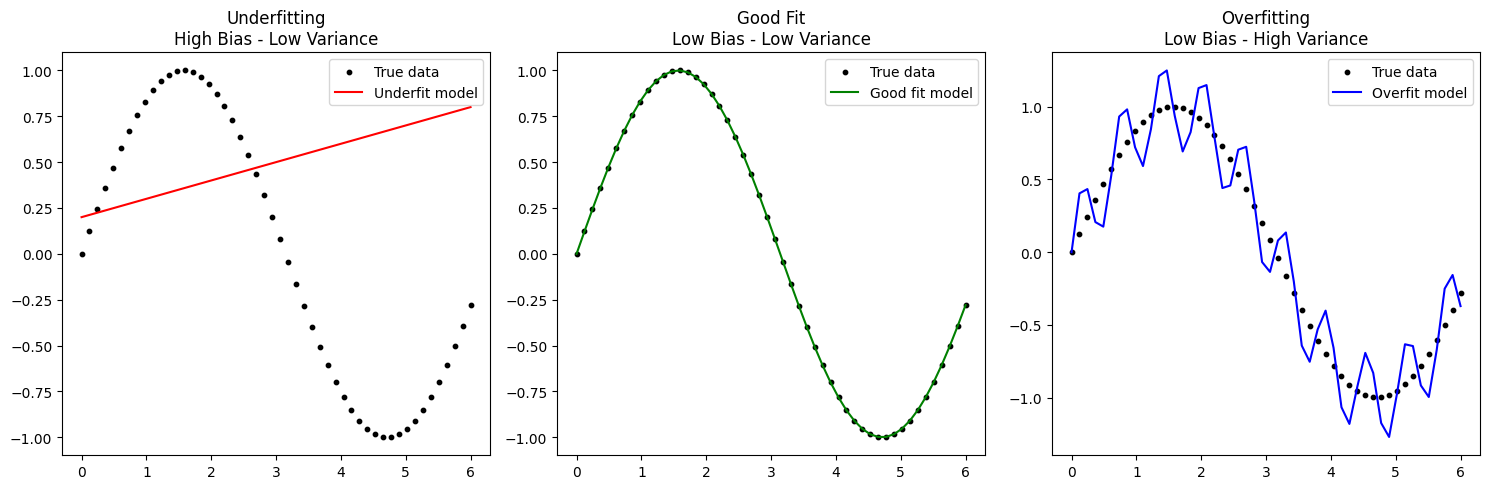

In [531]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = np.linspace(0, 6, 50)
y_true = np.sin(X)

def predict_model(X, kind="underfit"):
    if kind == "underfit":
        return 0.1 * X + 0.2
    elif kind == "goodfit":
        return np.sin(X)
    elif kind == "overfit":
        return np.sin(X) + 0.3 * np.sin(10 * X)
    
y_underfit = predict_model(X, "underfit")
y_goodfit = predict_model(X, "goodfit")
y_overfit = predict_model(X, "overfit")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Underfitting
axs[0].scatter(X, y_true, label="True data", color="black", s=10)
axs[0].plot(X, y_underfit, color="red", label="Underfit model")
axs[0].set_title("Underfitting\nHigh Bias - Low Variance")
axs[0].legend()

# Good fit
axs[1].scatter(X, y_true, label="True data", color="black", s=10)
axs[1].plot(X, y_goodfit, color="green", label="Good fit model")
axs[1].set_title("Good Fit\nLow Bias - Low Variance")
axs[1].legend()

# Overfitting
axs[2].scatter(X, y_true, label="True data", color="black", s=10)
axs[2].plot(X, y_overfit, color="blue", label="Overfit model")
axs[2].set_title("Overfitting\nLow Bias - High Variance")
axs[2].legend()

plt.tight_layout()
plt.show()


`Classification`

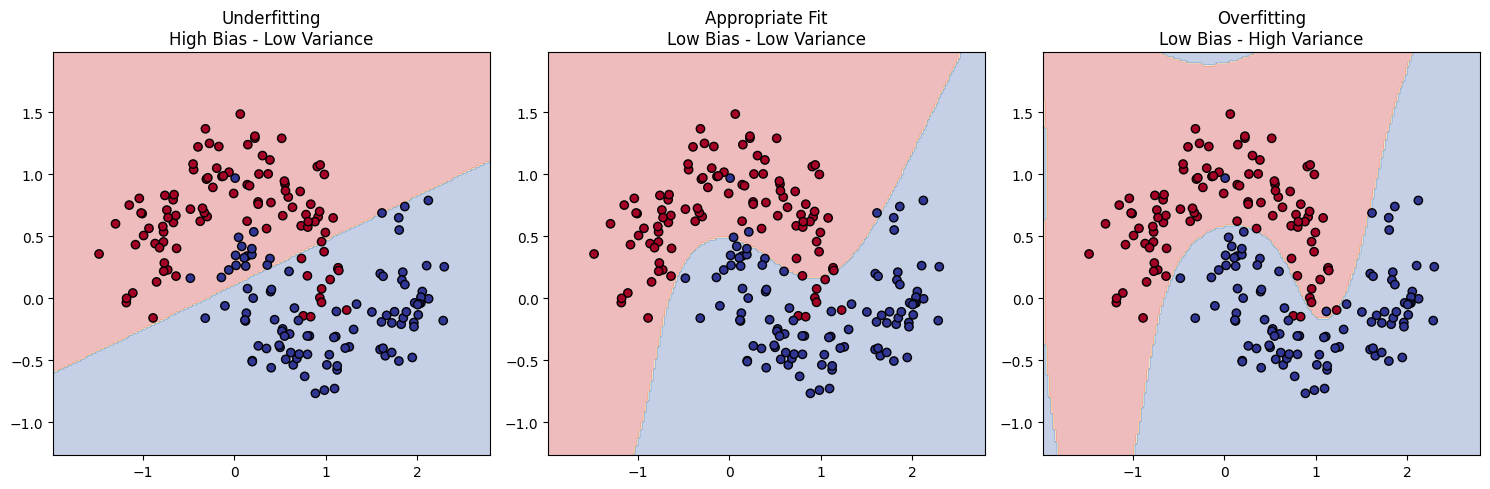

In [532]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

models = [
    ("Underfitting\nHigh Bias - Low Variance", make_pipeline(PolynomialFeatures(1), LogisticRegression())),
    ("Appropriate Fit\nLow Bias - Low Variance", make_pipeline(PolynomialFeatures(3), LogisticRegression())),
    ("Overfitting\nLow Bias - High Variance", make_pipeline(PolynomialFeatures(10), LogisticRegression()))
]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (title, model) in zip(axs, models):
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                         np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.RdYlBu)
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Bias and Variance
**Bias and Variance** are two key sources of error in machine learning models that directly impact their performance and generalization ability.
#### `Bias`
- Bias is simply defined as the inability of the model because of that there is some difference or error occurring between the model's predicted value and the actual value. These differences between actual or expected values and the predicted values are known as error or bias error or error due to bias. Bias is a systematic error that occurs due to wrong assumptions in the machine learning process.
- Let Y be the true value of a parameter and let $\hat{Y}$ be an estimator of Y based on a sample of data. Then, the bias of the estimator $\hat{Y}$ is given by:
    $$
    Bias(\hat{Y}) = E(\hat{Y}) - Y
    $$
    Where $E(\hat{Y})$ is the expected value of the estimator $\hat{Y}$. It is the measurement of the model that how well it fits the data.
- `Low Bias`: Low bias value means fewer assumptions are taken to build the target function. In this case, the model will closed match the training dataset.
- `High Bias`: High bias value means more assumptions are taken to build the target function. In this case, the model will not match the training dataset closely.
- **Ways to reduce high bias in Machine Learning**
   1. Use a more complex model.
   2. Increase the number of features.
   3. Reduce **Regulazization(L1, L2)** of the model.
   4. Increase the size of the training data.
#### `Variance`
- Variance is the measure of spread in data from its mean position. In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset.
- Let Y be the actual values of the target variable and $\hat{Y}$ be the predicted values of the target variable. Then the variance of a model can be measured as the expected value of the square of the difference between predicted values and the expected value of the predicted values.
  $$
  Variance = E[(\hat{Y} - E[\hat{Y}])^2]
  $$
  where $E(\hat{Y})$ is the expected value of the predicted values. Here expected value is averaged over all the training data.
- `Low Variance`: Low variance means that the model is less sensitive to changes in the training data and can produce consistent estimates of the target function with different subsets of data from the same distribution. **However, low variance can also indicate underfitting** if the model is too simple and fails to capture the underlying patterns in the data.
- `High variance`: High variance means that the model is very sensitive to changes in the training data and can result in significant changes in the estimate of the target function when trained on different subsets of data from the same distribution. 
- **Ways to reduce high variance in Machine Learning**
  1. Cross-Validation.
  2. Feature selection.
  3. Regulazization(L1, L2).
  4. Simplifying the model.
  5. Early stopping.
#### Different Combinations of Bias-Variance
There can be four combinations between bias and variance.
1. `High Bias, Low Variance`: A model with high bias and low variance is said to be **underfitting**.
2. `Low Bias, High Variance`: A model with low bias and high variance is said to be **overfitting**.
3. `High Bias, High Variance`: A model has both high bias and high variance, which means that the model is not able to capture the underlying patterns in the data (high bias) and is also too sensitive to changes in the training data (high variance). As a result, the model will produce inconsistent and inaccurate predictions on average.
4. `Low Bias, Low Variance`: A model that has low bias and low variance means that the model is able to capture the underlying patterns in the data (low bias) and is not too sensitive to changes in the training data (low variance). This is the ideal scenatio for machine learning model, as it is able to generalize well to new, unseen data and produce consistent and accurate predictions. But in practice, it's not possible.
#### Bias Variance Tradeoff
<img src="bias_variance_tradeoff.png" alt="Bias Variance" width="600" height="400"/>


### **How to Address Overfitting and Underfitting**
- `Techniques to Reduce Underfitting`
    1. Increase model complexity.
    2. Increase the number of features, performing feature engineering.
    3. Remove noise from the data.
    4. Increase the number of epochs or increase the duration of training to get better results.
- `Techniques to Reduce Overfitting`
    1. Improving the quality of training data reduces overfitting by focusing on meaningful patterns, mitigate the risk of fitting the noise or irrelevant features.
    2. Increase the training data can improve the model's ability to generalize to unseen data and reduce the likelihood of overfitting.
    3. Reduce model complexity.
    4. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    5. Ridge Regularization and Lasso Regularization.
    6. Use dropout for neural networks to tackle overfitting.

### Regularization
#### `1. Lasso Regression (L1)`
A regression model which uses the **L1 Regularization** technique is called **LASSO (Least Absolute Shrinkage and Selection Operator)** regression. It adds the **absolute value of magnitude** of the coefficient as a penalty term to the loss function. This penalty can shrink sime coefficients to zero which helps in selecting only the import features and ignoring the less important ones.
$$
J(W, b) = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}_i - y_{i})^2 + \lambda \sum_{i=1}^{M}|{w_{i}}|
$$
Gradient Descent:
$$
W:= W - \alpha (\frac{2}{N} \sum_{i=1}^{N} (X_i \cdot (X_i \cdot W + b - y_i)) + \lambda \cdot sign(W))
$$
$$
b:= b - \alpha (\frac{2}{N} \sum_{i=1}^{N}(W \cdot X_i + b - y_i))
$$


#### L1 uses Library

In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [534]:

data = pd.read_csv("Housing.csv")
X = data.loc[:, ["area", "bedrooms", "bathrooms"]].values
y = data.loc[:, "price"].values

In [535]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [536]:
print(lasso.coef_)
print(lasso.intercept_)

print(lr.coef_)
print(lr.intercept_)

[3.78762775e+02 4.06819931e+05 1.38604914e+06]
-173170.95332429837
[3.78762754e+02 4.06820034e+05 1.38604950e+06]
-173171.6076326333


In [537]:
y_pred_lasso = lasso.predict(X)
y_pred_lr = lr.predict(X)

mse_lasso = mean_squared_error(y, y_pred_lasso)
mse_lr = mean_squared_error(y, y_pred_lr)

print(mse_lasso)
print(mse_lr)

1791170049977.3655
1791170049977.319


#### L1 without library

In [538]:
X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0)
y_mean, y_std = np.mean(y, axis=0), np.std(y, axis=0)

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [539]:
def predict(X, W, b):
    return X @ W + b

In [540]:
def cost_function(X, y, W, b, lamb):
    N = X.shape[0]

    y_pred = predict(X, W, b)
    errors = (y_pred - y) ** 2
    return np.sum(errors) / N + lamb * np.sum(np.abs(W))


In [541]:
def update(X, y, W, b, learning_rate, lamb):
    N = X.shape[0]

    y_pred = predict(X, W, b)
    errors = y_pred - y

    grad_W = (2 / N) * X.T @ errors
    grad_W += lamb * np.sign(W)

    grad_b = (2 / N) * np.sum(errors)

    W -= learning_rate * grad_W
    b -= learning_rate * grad_b

    return W, b

In [542]:
def train(X, y, W, b, learning_rate=0.1, lamb=0.1, epochs=1000):
    costs = []
    for _ in range(epochs):
        W, b = update(X, y, W, b, learning_rate, lamb)
        costs.append(cost_function(X, y, W, b, lamb))
    return W, b, costs

In [543]:
W, b = np.zeros(X.shape[1]), 0.0
learning_rate = 0.01
lamb = 0.1
epochs = 1000

W, b, costs = train(X_scaled, y_scaled, W, b, learning_rate, lamb, epochs)

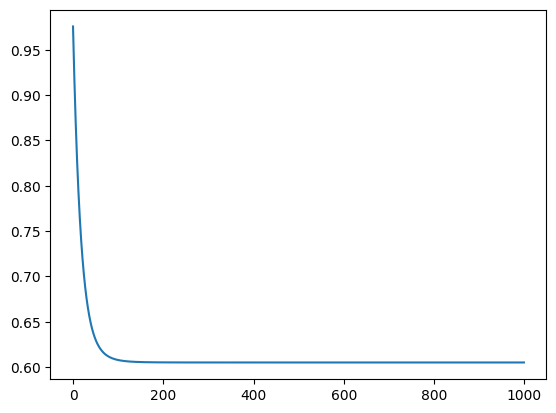

In [544]:
plt.plot(costs)

In [545]:
# Unscaled
W = y_std / X_std * W
b = y_std * b + y_mean - np.sum(W * X_mean)

In [546]:
print(W)
print(b)

[3.44994559e+02 3.23757586e+05 1.27381390e+06]
391406.20755685866


In [547]:
y_pred = cost_function(X, y, W, b, lamb)
print(y_pred)

1808998458712.3452


#### `2. Ridge Regression`
A regression model that uses the **L2 regularization** technique is called **Ridge regression**. It adds the **squared magnitude** of the coefficient as a penalty term to the loss function. It handles multicollinearity by shrinking the coefficients of correlated features instead of eliminating them.
$$
J(W, b) = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}_i - y_{i})^2 + \lambda \sum_{i=1}^{M}{w_{i}^2}
$$
Gradient Descent:
$$
W := W(1 - 2\alpha\lambda) - \alpha (\frac{2}{N} \sum_{i=1}^{N}(X_i \cdot (X_i \cdot W + b - y_i)))
$$
$$
b := b - \alpha \frac{2}{N} \sum_{i=1}^{N}(X_i \cdot W + b - y_i)
$$

#### L2 uses library

In [548]:
from sklearn.linear_model import Ridge

In [549]:
X = data.loc[:, ["area", "bedrooms", "bathrooms"]].values
y = data.loc[:, "price"].values

In [550]:
ridge = Ridge(alpha=0.1)
lr = LinearRegression()

ridge.fit(X, y)
lr.fit(X, y)

LinearRegression()

In [551]:
print(ridge.coef_)
print(ridge.intercept_)

print(lr.coef_)
print(lr.intercept_)

[3.78806209e+02 4.06947015e+05 1.38493503e+06]
-172338.46871699113
[3.78762754e+02 4.06820034e+05 1.38604950e+06]
-173171.6076326333


In [552]:
y_pred_ridge = ridge.predict(X)
y_pred_lr = lr.predict(X)

mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lr = mean_squared_error(y, y_pred_lr)

print(mse_ridge)
print(mse_lr)

1791170323701.1323
1791170049977.319


#### L2 without library

In [553]:
X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0)
y_mean, y_std = np.mean(y, axis=0), np.std(y, axis=0)

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [554]:
def predict(X, W, b):
    return X @ W + b

In [555]:
def cost_function(X, y, W, b, lamb):
    N = X.shape[0]

    y_pred = predict(X, W, b)
    errors = (y_pred - y) ** 2
    return np.sum(errors) / N + lamb * np.sum(W ** 2)

In [556]:
def update(X, y, W, b, learning_rate, lamb):
    N = X.shape[0]

    y_pred = predict(X, W, b)
    errors = y_pred - y

    W = W * (1 - 2 * learning_rate * lamb) - (2 * learning_rate / N) * (X.T @ errors)
    b -= (2 * learning_rate / N) * np.sum(errors)

    return W, b

In [557]:
def train(X, y, W, b, learning_rate=0.1, lamb=0.1, epochs=1000):
    costs = []
    for _ in range(epochs):
        W, b = update(X, y, W, b, learning_rate, lamb)
        costs.append(cost_function(X, y, W, b, lamb))
    return W, b, costs

In [558]:
W, b = np.zeros(X.shape[1]), 0.0
learning_rate = 0.01
lamb = 0.1
epochs = 1000

W, b, costs = train(X_scaled, y_scaled, W, b, learning_rate, lamb, epochs)

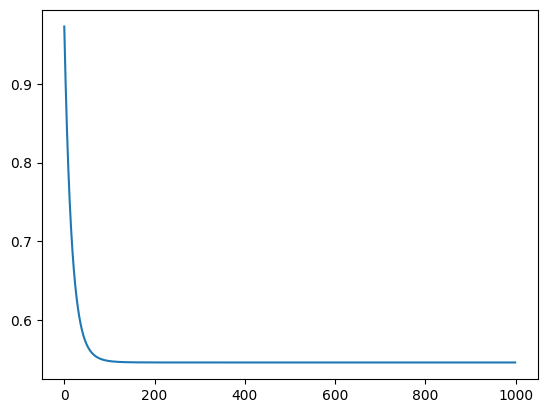

In [559]:
plt.plot(costs)

In [560]:
W = y_std / X_std * W
b = y_std * b + y_mean - np.sum(W * X_mean)

In [561]:
print(W)
print(b)

[3.48559162e+02 4.05823011e+05 1.28352760e+06]
117217.16881395597


In [562]:
print(cost_function(X, y, W, b, lamb))

1980670783316.8154


#### `3. Elastic Net Regression`
**Elastic Net Regression** is a combination of both L1 as well as L2 regularization. That shows that we add the **absolute norm of the weights** as well as the **squared measure of the weights**. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.
$$
J(W, b) = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}_i - y_{i})^2 + \lambda ((1 - \alpha)\sum_{i=1}^{M}|{w_{i}}| + \alpha \sum_{i=1}^{M}{w_{i}^2})
$$

In [563]:
from sklearn.linear_model import ElasticNet

In [564]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.1)
elasticnet.fit(X, y)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [565]:
print(elasticnet.coef_)
print(elasticnet.intercept_)

[3.94921501e+02 4.26430460e+05 1.00340917e+06]
177621.2107232595


In [566]:
y_pred_elasticnet = elasticnet.predict(X)
print(mean_squared_error(y, y_pred_elasticnet))

1824972462545.835


#### `4. Early Stopping`
Early stopping is a regularization technique that stops model training when overfitting signs appear. It prevents the model from performing well on the training set but underperforming on unseen data i.e validation set. Training stops when performance improves on the training set but degrades on the validation set, promoting better generalization while saving time and resources.

The technique monitors the model’s performance on both the training and validation sets. If the validation performance worsens, training stops and the model retains the best weights from the period of optimal validation performance.

<img src="early_stopping.png" alt="Bias Variance" width="500" height="400"/>

In [567]:
from sklearn.model_selection import train_test_split

In [568]:
np.random.seed(42)
X = np.random.rand(200, 1)
y = 4*X[:, 0] + np.random.randn(200) * 0.5

In [569]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
def predict(X, W, b):
    return X @ W + b

In [571]:
def loss(X, y, W, b):
    N = X.shape[0]
    y_pred = predict(X, W, b)
    errors = (y_pred - y) ** 2
    return np.sum(errors) / N

In [572]:
def train(X_train, y_train, X_val, y_val, lr=0.1, epochs=200, patience=20):
    n, d = X_train.shape
    W = np.zeros(d)
    b = 0.0

    best_val_loss = float('inf')
    best_W = W.copy()
    best_b = b
    patience_counter = 0

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        y_pred = predict(X_train, W, b)
        errors = y_pred - y_train

        grad_W = (2 / n) * X_train.T @ errors
        grad_b = (2 / n) * np.sum(errors)

        W -= lr * grad_W
        b -= lr * grad_b

        train_loss = loss(X_train, y_train, W, b)
        val_loss = loss(X_val, y_val, W, b)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_W = W.copy()
            best_b = b
            patience_counter = 0
        else:
            patience_counter += 1

        # if patience_counter >= patience:
        #     print(f"Early stopping at epoch {epoch}")
        #     break

    return best_W, best_b, best_val_loss, train_losses, val_losses

In [573]:
W, b, best_val_loss, train_losses, val_losses = train(X_train, y_train, X_val, y_val, lr=0.1, epochs=200, patience=20)
print("Weights:", W)
print("Bias:", b)
print("Best Validation Loss:", best_val_loss)

Weights: [3.59849014]
Bias: 0.2422159719362279
Best Validation Loss: 0.25309443593688624


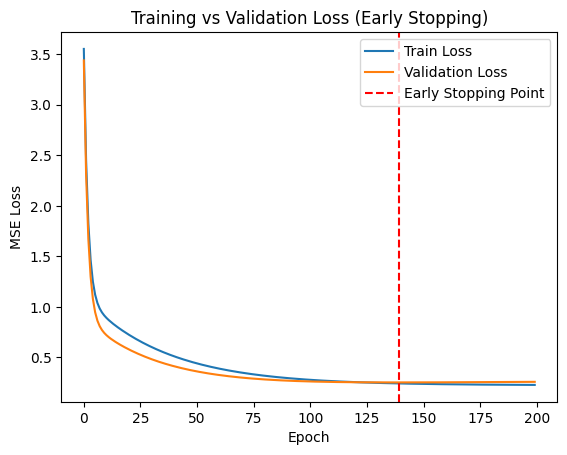

In [574]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.axvline(np.argmin(val_losses), color='r', linestyle='--', label='Early Stopping Point')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Early Stopping)")
plt.legend()
plt.show()